In [1]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_train.Age.nunique()

88

<AxesSubplot:xlabel='Age', ylabel='Count'>

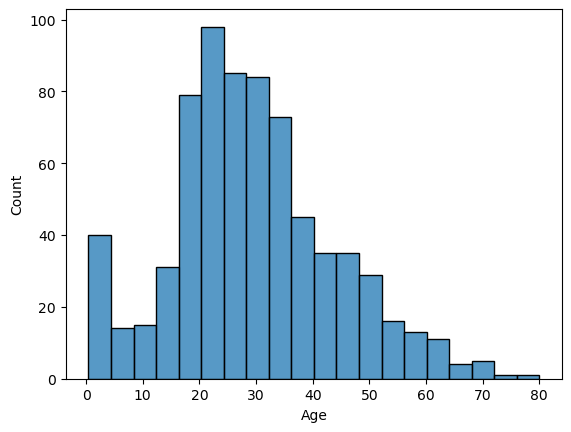

In [7]:
sns.histplot(titanic_train.Age)

In [8]:
# Train
titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


C:\Users\omarh\AppData\Local\Temp\ipykernel_18712\508161829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()


In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Cabin has too many missing values

titanicdata=titanic_train.drop(['Cabin'],axis=1)

0    S
Name: Embarked, dtype: object

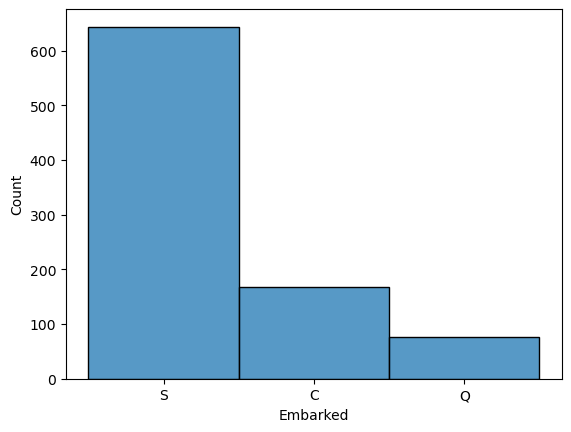

In [11]:
# Embarked 

titanicdata.Embarked.unique()
sns.histplot(titanicdata.Embarked)
titanicdata.Embarked.mode()

In [12]:
# Fill null values with mode

titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]
print(titanicdata.Embarked.isna().sum())

0


C:\Users\omarh\AppData\Local\Temp\ipykernel_18712\1571690487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]


In [13]:
# Remove PassengerId, Name, Ticket columns as they are not useful

titanicdata = titanicdata.drop(['PassengerId','Name','Ticket'],axis=1)

In [14]:
# Convert categorical data to numerical data

encoded_data = pd.get_dummies(titanicdata,columns=['Sex','Embarked'])
encoded_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
# Convert categorical data to numerical data using label encoding

ordinal_encoded = encoded_data.copy()
ordinaldf = pd.DataFrame(ordinal_encoded, columns=titanicdata.columns)
ordinaldf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,NaN,22.000000,1,0,7.2500,NaN
1,1,1,NaN,38.000000,1,0,71.2833,NaN
2,1,3,NaN,26.000000,0,0,7.9250,NaN
3,1,1,NaN,35.000000,1,0,53.1000,NaN
4,0,3,NaN,35.000000,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,NaN,27.000000,0,0,13.0000,NaN
887,1,1,NaN,19.000000,0,0,30.0000,NaN
888,0,3,NaN,29.699118,1,2,23.4500,NaN
889,1,1,NaN,26.000000,0,0,30.0000,NaN


In [17]:
# Split data into X and Y

X = encoded_data.drop('Survived',axis=1)
Y = encoded_data['Survived']

# SPlit data into train and test

Xtrain,Xval, Ytrain,Yval= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

Xtrain.head()
Ytrain.head()


692    1
481    0
527    0
855    1
801    1
Name: Survived, dtype: int64

In [18]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=19, random_state=42)
DTC.fit(Xtrain, Ytrain)


DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)

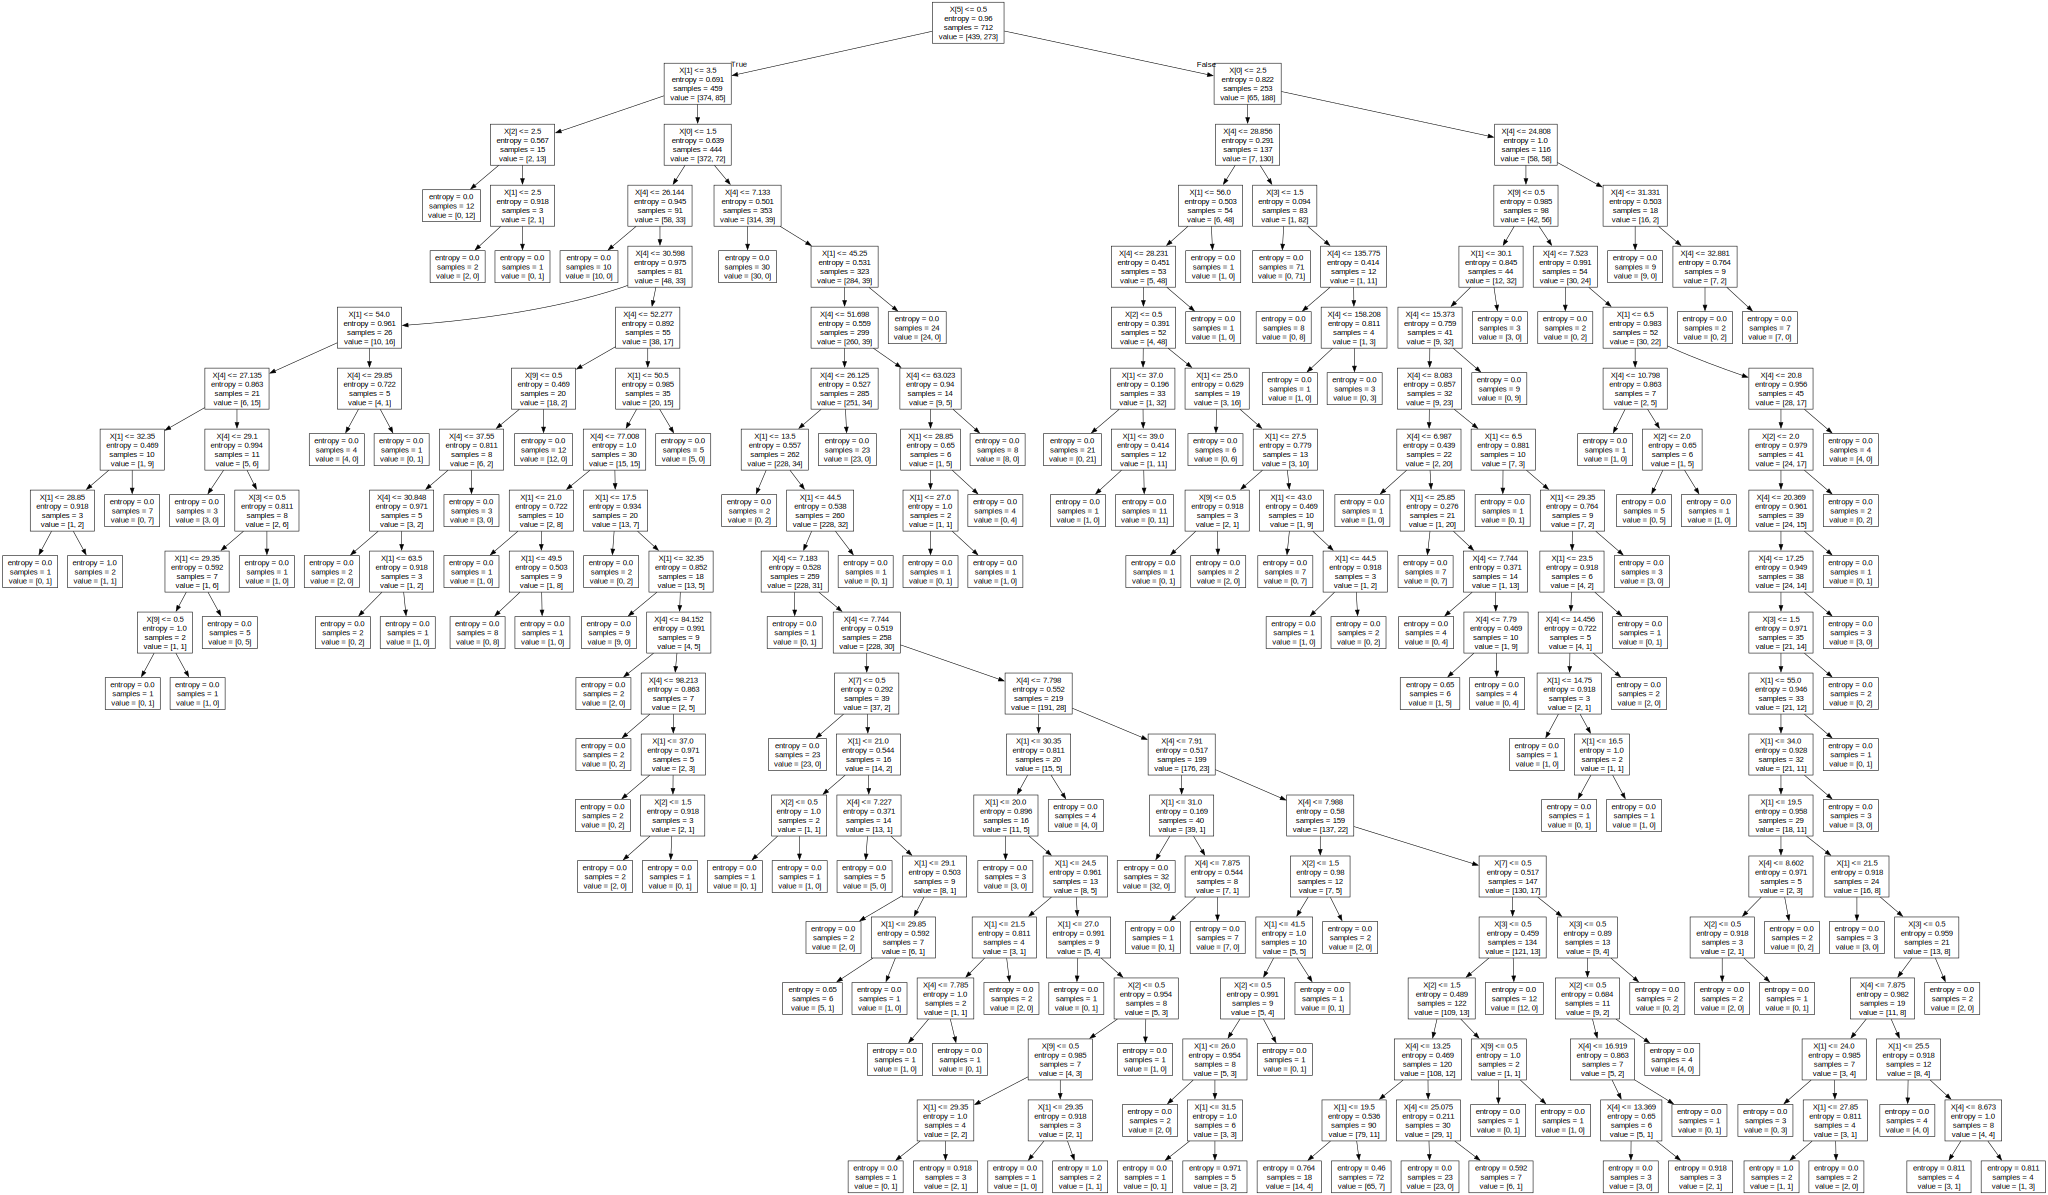

In [19]:
# Plot the decision tree

import graphviz
dot_data=tree.export_graphviz(DTC)
graph = graphviz.Source(dot_data, format="png")
graph

In [20]:
# Predictions and accuracy score for train and test data

Ypredict = DTC.predict(Xval)
accuracy_score(Yval,Ypredict)
y_train_predict=DTC.predict(Xtrain)
y_test_predict=DTC.predict(Xval)
train_acc=accuracy_score(Ytrain,y_train_predict)
test_acc=accuracy_score(Yval,y_test_predict)
print("training acc = ",train_acc * 100,"%")
print("test acc = ",test_acc * 100,"%")

# Comment

print("The model is overfitting as the training accuracy is ", train_acc * 100, "% and test accuracy is ", test_acc * 100, "%")

training acc =  96.76966292134831 %
test acc =  79.88826815642457 %
The model is overfitting as the training accuracy is  96.76966292134831 % and test accuracy is  79.88826815642457 %
